# Ứng dụng các thuật toán phân loại để dự đoán khả năng rời bỏ của khách hàng
---

#### I. Decision Tree
#### II. Random Forest
#### III. K - Nearest Neighbor
#### IV. Logicstic Regression

---

# I. Decision Tree

In [24]:
import pandas as pd

# 1. Đọc dữ liệu từ file Excel
df = pd.read_excel(r'D:\KHO\code\Telco_Churn_dataset.xlsx') 

# 2. Xử lý giá trị thiếu (missing values)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  # Chuyển 'TotalCharges' sang kiểu số
df.fillna({'TotalCharges': df['TotalCharges'].median()}, inplace=True)   # Thay thế giá trị thiếu bằng trung vị (median)


## 1. Mã hóa các biến phân loại 

In [25]:
from sklearn.preprocessing import LabelEncoder

# 3. Mã hóa các biến phân loại (categorical variables) thành số
label_encoders = {}  # Tạo dictionary để lưu các bộ mã hóa (encoder)
for col in df.select_dtypes(include='object').columns:  # Chỉ chọn các cột kiểu object
    if col != 'customerID':  # Bỏ qua cột 'customerID' vì đây không phải đặc trưng (feature)
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])  # Mã hóa các giá trị phân loại thành số
        label_encoders[col] = le  # Lưu bộ mã hóa vào dictionary


## 2. Chuẩn bị dữ liệu huấn luyện

In [26]:
# 4. Chọn các cột quan trọng (selected features) để huấn luyện mô hình
X = df.drop(columns=['customerID', 'Churn'])
y = df['Churn']

# 5. Chia dữ liệu thành tập huấn luyện (train) và tập kiểm tra (test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 3. Huấn luyện mô hình Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

# 6. Huấn luyện mô hình Decision Tree với siêu tham số mới
decision_tree = DecisionTreeClassifier(
    random_state=42,  # Giữ nguyên random_state để kết quả có thể tái tạo
    max_depth=7,  # Giới hạn độ sâu của cây là 7
    min_samples_leaf=2,  # Mỗi lá của cây cần ít nhất 2 mẫu
    min_samples_split=8  # Mỗi phân chia (split) cần ít nhất 8 mẫu
)
decision_tree.fit(X_train, y_train)  # Huấn luyện mô hình trên tập huấn luyện


DecisionTreeClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=8,
                       random_state=42)

## 4. Dự đoán và đánh giá mô hình

In [28]:
from sklearn.metrics import accuracy_score, classification_report

# 7. Dự đoán trên tập kiểm tra
y_pred = decision_tree.predict(X_test)

# 8. Đánh giá mô hình
accuracy_train = accuracy_score(y_train, decision_tree.predict(X_train))  # Tính độ chính xác trên tập huấn luyện
accuracy_test = accuracy_score(y_test, y_pred)  # Tính độ chính xác trên tập kiểm tra

# In ra độ chính xác của tập huấn luyện và kiểm tra
print(f"Accuracy on Train Set: {accuracy_train:.2f}")
print(f"Accuracy on Test Set: {accuracy_test:.2f}")

# Tạo báo cáo phân loại cho tập huấn luyện và tập kiểm tra
classification_report_train = classification_report(y_train, decision_tree.predict(X_train), output_dict=True)  # Báo cáo cho tập huấn luyện
classification_report_test = classification_report(y_test, y_pred, output_dict=True)  # Báo cáo cho tập kiểm tra

# Chuyển báo cáo thành DataFrame và in ra bảng
print("\nClassification Report for Train Set:")
train_report_df = pd.DataFrame(classification_report_train).transpose()  # Chuyển thành DataFrame
print(train_report_df)

print("\nClassification Report for Test Set:")
test_report_df = pd.DataFrame(classification_report_test).transpose()  # Chuyển thành DataFrame
print(test_report_df)


Accuracy on Train Set: 0.87
Accuracy on Test Set: 0.86

Classification Report for Train Set:
              precision    recall  f1-score      support
0              0.897502  0.928951  0.912956  4138.000000
1              0.782383  0.706551  0.742536  1496.000000
accuracy       0.869897  0.869897  0.869897     0.869897
macro avg      0.839943  0.817751  0.827746  5634.000000
weighted avg   0.866934  0.869897  0.867704  5634.000000

Classification Report for Test Set:
              precision    recall  f1-score      support
0              0.888889  0.918919  0.903654  1036.000000
1              0.751479  0.680965  0.714487   373.000000
accuracy       0.855926  0.855926  0.855926     0.855926
macro avg      0.820184  0.799942  0.809071  1409.000000
weighted avg   0.852513  0.855926  0.853577  1409.000000


## 5. Ma Trận Nhầm Lẫn (Confusion Matrix)



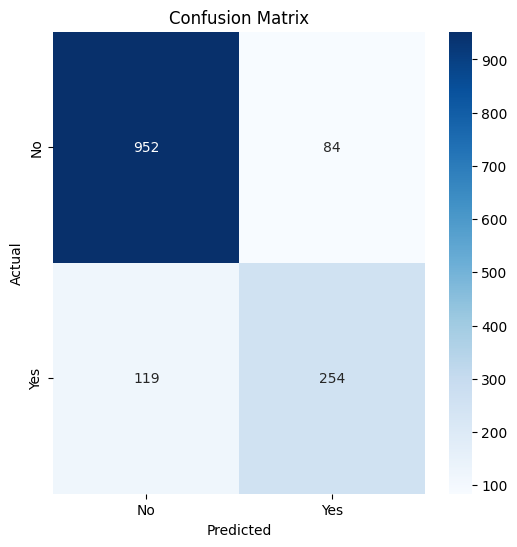

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt  # Đảm bảo import matplotlib.pyplot


# 10. Tạo ma trận nhầm lẫn cho tập kiểm tra
cm = confusion_matrix(y_test, y_pred)

# 11. Trực quan hóa ma trận nhầm lẫn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## 6. Đánh giá độ quan trọng của các đặc trưng

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11952\1524136122.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


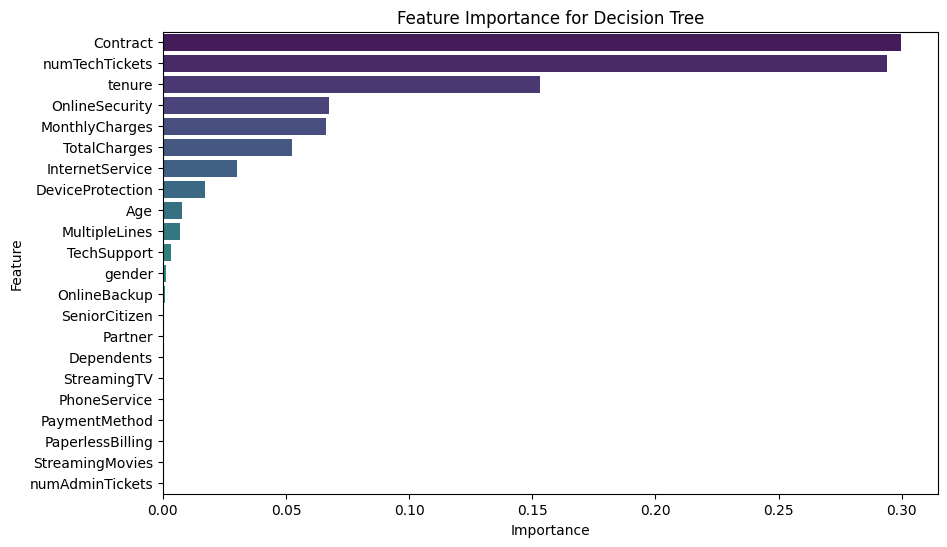

In [30]:
# Vẽ độ quan trọng của các đặc trưng cho mô hình Decision Tree
import matplotlib.pyplot as plt
import seaborn as sns

# Lấy độ quan trọng của các đặc trưng từ mô hình Decision Tree
importances = decision_tree.feature_importances_

# Tạo DataFrame với tên đặc trưng và độ quan trọng
features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Sắp xếp độ quan trọng giảm dần
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Vẽ biểu đồ độ quan trọng của các đặc trưng
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance for Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


## 7. Đánh giá mô hình bằng AUC và ROC Curve

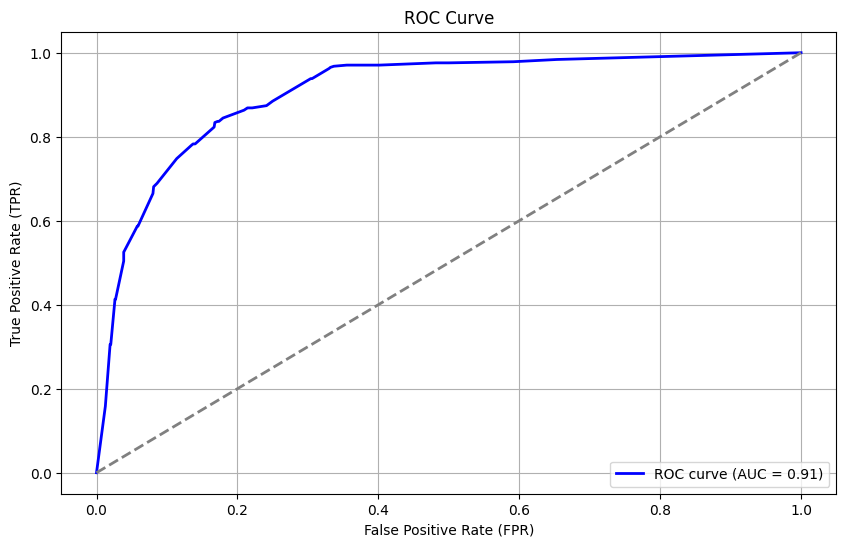

AUC: 0.91

ROC Curve Data:
    False Positive Rate (FPR)  True Positive Rate (TPR)  Thresholds
0                    0.000000                  0.000000         inf
1                    0.012548                  0.158177    1.000000
2                    0.019305                  0.305630    0.918919
3                    0.020270                  0.305630    0.875000
4                    0.026062                  0.410188    0.821429
5                    0.026062                  0.412869    0.818182
6                    0.027027                  0.412869    0.800000
7                    0.038610                  0.504021    0.751381
8                    0.038610                  0.506702    0.750000
9                    0.038610                  0.517426    0.736842
10                   0.038610                  0.525469    0.722222
11                   0.039575                  0.528150    0.666667
12                   0.057915                  0.587131    0.625000
13                   

In [31]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 1. Dự đoán xác suất cho các lớp
y_prob = decision_tree.predict_proba(X_test)[:, 1]  # Dự đoán xác suất cho lớp 1 (Churn)

# 2. Tính toán ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)  # fpr: Tỷ lệ âm giả, tpr: Tỷ lệ đúng
roc_auc = auc(fpr, tpr)  # Tính AUC

# 3. Vẽ ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Đường chéo (ngẫu nhiên)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# 4. Tạo bảng AUC
print(f"AUC: {roc_auc:.2f}")

# 5. Tạo bảng ROC (FPR, TPR, Thresholds)
roc_table = pd.DataFrame({
    'False Positive Rate (FPR)': fpr,
    'True Positive Rate (TPR)': tpr,
    'Thresholds': thresholds
})

print("\nROC Curve Data:")
print(roc_table)


# II. Random Forest

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
# Đọc dữ liệu từ file Excel
data = pd.read_excel(r'D:\KHO\code\Telco_Churn_dataset.xlsx') 

# Sao chép dữ liệu để xử lý
df_cleaned = data.copy()

## 1. Chọn Các Đặc Trưng và Chia Dữ Liệu




In [33]:
# Bỏ cột 'customerID'
if 'customerID' in df_cleaned.columns:
    df_cleaned.drop('customerID', axis=1, inplace=True)

# Chuyển 'TotalCharges' về dạng số, thay thế giá trị không hợp lệ bằng NaN
if 'TotalCharges' in df_cleaned.columns:
    df_cleaned['TotalCharges'] = pd.to_numeric(df_cleaned['TotalCharges'], errors='coerce')
# Điền giá trị thiếu (NaN) trong các cột số bằng giá trị trung vị
    df_cleaned.fillna(df_cleaned.median(numeric_only=True), inplace=True)
# Mã hóa các biến phân loại thành số (One-Hot Encoding), bỏ một cột để tránh multicollinearity
    df_encoded = pd.get_dummies(df_cleaned, drop_first=True)


## 2. Chia dữ liệu thành tập train-test

In [34]:
# Chia dữ liệu thành biến độc lập (X) và biến phụ thuộc (y)
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']
# Chia dữ liệu thành tập train-test theo tỷ lệ 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## 3. Xây dựng mô hình Random Forest

In [35]:
# Khởi tạo mô hình Random Forest với các siêu tham số
rf_model = RandomForestClassifier(
    random_state=42,
    n_estimators=200,
    max_depth=10,
    min_samples_leaf=4,
    min_samples_split=10
)
# Huấn luyện mô hình trên tập train
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=200, random_state=42)

## 4. Đánh giá hiệu suất trên tập Train và tập Test

In [36]:
# Dự đoán trên tập train và đánh giá hiệu suất
y_train_pred = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)

# In kết quả trên tập Train
print("Độ chính xác trên tập Train:", train_accuracy)
print("\nBáo cáo phân loại trên tập Train:\n", train_report)
# Dự đoán trên tập test và đánh giá hiệu suất
y_test_pred = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

# In kết quả trên tập Test
print("\nĐộ chính xác trên tập Test:", test_accuracy)
print("\nBáo cáo phân loại trên tập Test:\n", test_report)

Độ chính xác trên tập Train: 0.8970536031238907

Báo cáo phân loại trên tập Train:
               precision    recall  f1-score   support

       False       0.92      0.94      0.93      4139
        True       0.83      0.77      0.80      1495

    accuracy                           0.90      5634
   macro avg       0.88      0.86      0.86      5634
weighted avg       0.90      0.90      0.90      5634


Độ chính xác trên tập Test: 0.8559261887863733

Báo cáo phân loại trên tập Test:
               precision    recall  f1-score   support

       False       0.88      0.92      0.90      1035
        True       0.76      0.67      0.71       374

    accuracy                           0.86      1409
   macro avg       0.82      0.80      0.81      1409
weighted avg       0.85      0.86      0.85      1409



## 5. Ma Trận Nhầm Lẫn (Confusion Matrix)


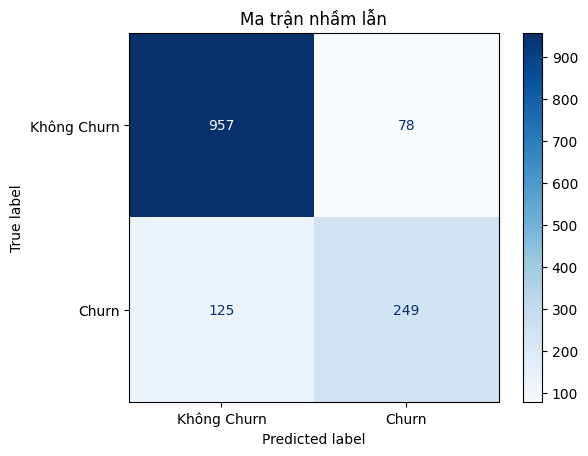

In [37]:
# 1. Ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=["Không Churn", "Churn"]).plot(cmap='Blues')
plt.title("Ma trận nhầm lẫn")
plt.show()


## 6. Đánh giá độ quan trọng của các đặc trưng

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11952\2764738785.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


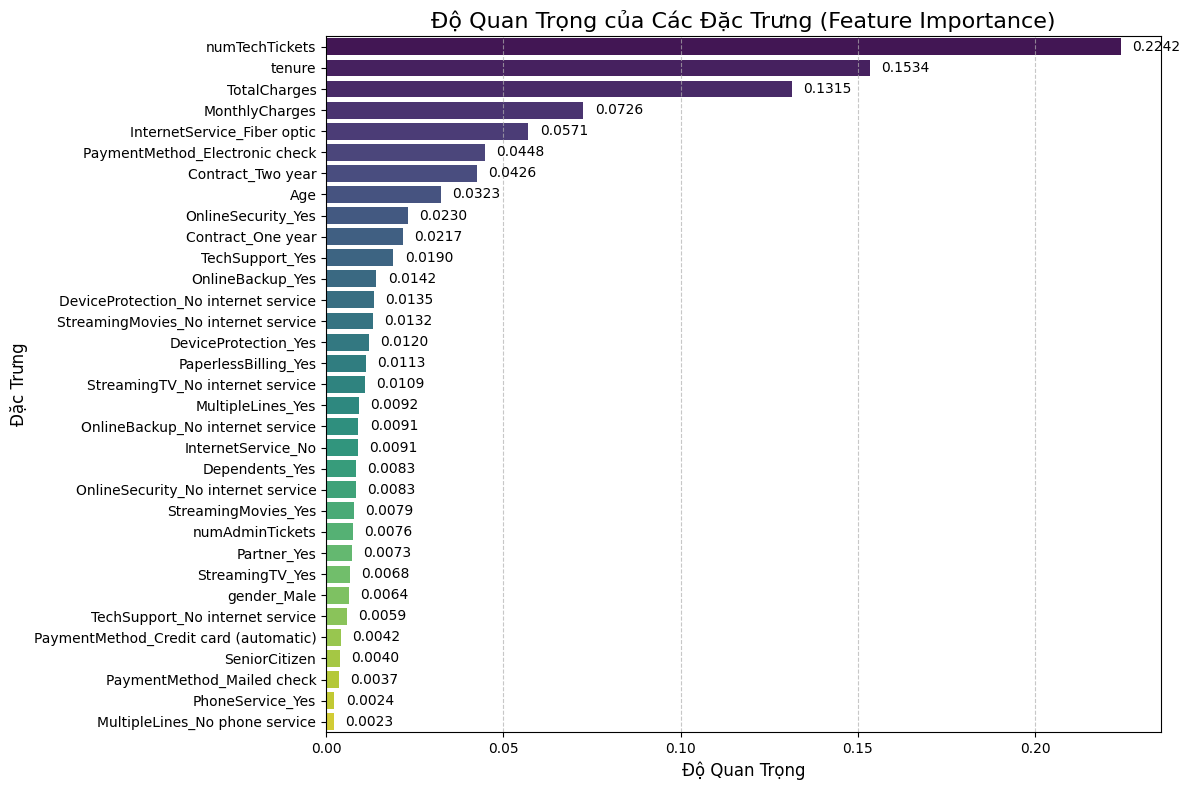

In [38]:
# Lấy độ quan trọng của các đặc trưng từ mô hình Random Forest
importances = rf_model.feature_importances_

# Tạo DataFrame chứa tên đặc trưng và giá trị độ quan trọng
features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Sắp xếp độ quan trọng theo thứ tự giảm dần
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Vẽ biểu đồ thể hiện độ quan trọng của các đặc trưng
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')

# Thêm giá trị độ quan trọng vào mỗi cột
for i in range(len(importance_df)):
    ax.text(importance_df.Importance.iloc[i] + 0.01, i, f'{importance_df.Importance.iloc[i]:.4f}',
            color='black', ha='center', va='center')

plt.title('Độ Quan Trọng của Các Đặc Trưng (Feature Importance)', fontsize=16)
plt.xlabel('Độ Quan Trọng', fontsize=12)
plt.ylabel('Đặc Trưng', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## 7. Đánh giá mô hình bằng AUC và ROC Curve

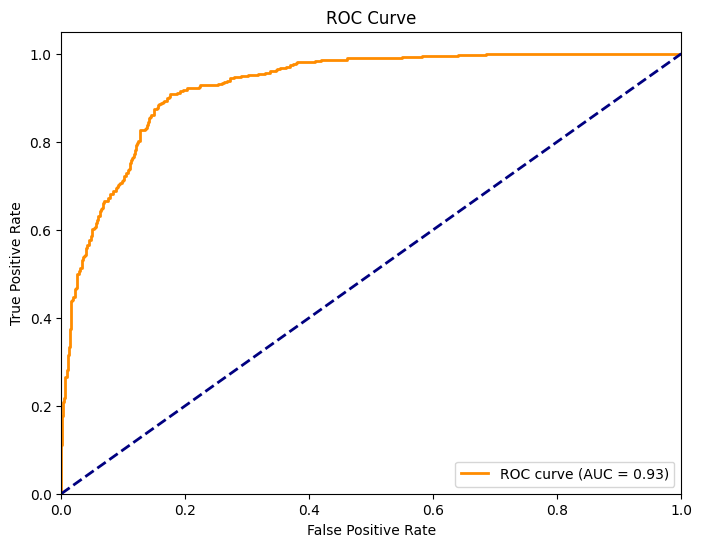

In [39]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Tính giá trị dự đoán xác suất cho tập kiểm tra (y_pred_proba)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]  # Chọn xác suất của lớp '1' (churn)

# Tính đường ROC và AUC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Vẽ đường ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


# III. K-Nearest Neighbors

## 1. Đọc Dữ Liệu và Xử Lý Thiếu

In [40]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Đọc dữ liệu từ file Excel
file_path = r'D:\KHO\code\Telco_Churn_dataset.xlsx'
data = pd.ExcelFile(file_path)
df = data.parse(data.sheet_names[0])

# Xử lý giá trị thiếu (missing values)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.fillna({'TotalCharges': df['TotalCharges'].median()}, inplace=True)


## 2. Mã Hóa Các Biến Phân Loại

In [41]:
# Mã hóa các biến phân loại thành số
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    if col != 'customerID':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le


## 3. Chọn các đặc trưng Và chia dữ liệu

In [42]:
# Chỉ chọn các cột 'numAdminTickets', 'numTechTickets', 'Age', 'tenure'
X = df[['numAdminTickets', 'numTechTickets', 'Age', 'tenure']]
y = df['Churn']
# Chia dữ liệu thành tập train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu (feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 4. Huấn luyện mô hình với KNN 

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Lặp qua các giá trị K từ 1 đến 20 và lưu kết quả độ chính xác
k_values = range(1, 21)
results = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)  # Sử dụng accuracy_score để tính độ chính xác
    results.append({'K': k, 'Accuracy': accuracy})

# Tạo DataFrame để hiển thị kết quả
results_df = pd.DataFrame(results)
print(results_df)




     K  Accuracy
0    1  0.781405
1    2  0.799858
2    3  0.799148
3    4  0.809084
4    5  0.815472
5    6  0.818311
6    7  0.815472
7    8  0.825408
8    9  0.823279
9   10  0.818311
10  11  0.823279
11  12  0.826118
12  13  0.821859
13  14  0.830376
14  15  0.828247
15  16  0.827537
16  17  0.826118
17  18  0.821859
18  19  0.822569
19  20  0.823279


## 5. Vẽ biểu đồ độ chính xác qua các giá trị K và tìm giá trị K tốt nhất

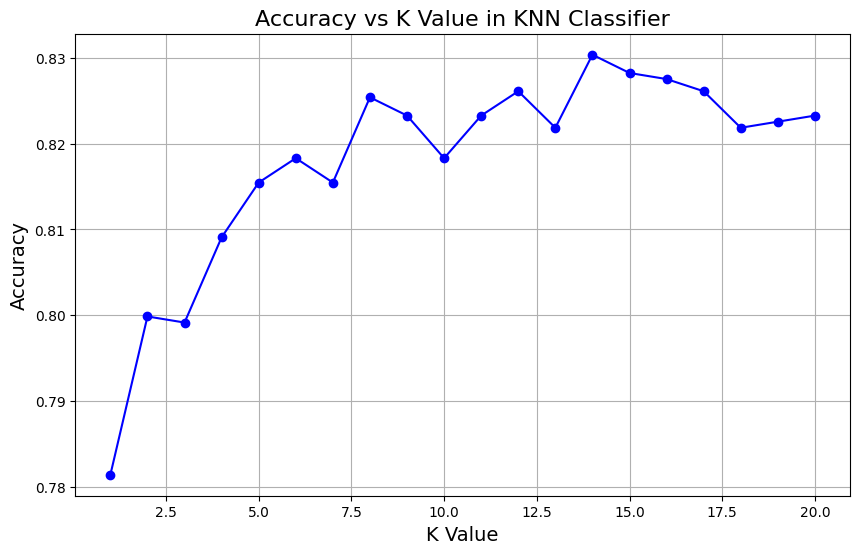

Best K: 14


In [44]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ độ chính xác qua các giá trị K
plt.figure(figsize=(10, 6))
plt.plot(results_df['K'], results_df['Accuracy'], marker='o', linestyle='-', color='b')
plt.title('Accuracy vs K Value in KNN Classifier', fontsize=16)
plt.xlabel('K Value', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()
# Tìm giá trị K tốt nhất
best_k = results_df.loc[results_df['Accuracy'].idxmax(), 'K']
print(f'Best K: {best_k}')


## 6. Đánh giá mô hình trên tập Train và Test

In [45]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Đánh giá trên tập train
y_pred_train = knn.predict(X_train_scaled)
print("\nTrain Set Evaluation:")
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Classification Report:\n", classification_report(y_train, y_pred_train))

# Đánh giá trên tập test
y_pred_test = knn.predict(X_test_scaled)
print("\nTest Set Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Classification Report:\n", classification_report(y_test, y_pred_test))



Train Set Evaluation:
Accuracy: 0.8333333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89      4138
           1       0.75      0.55      0.64      1496

    accuracy                           0.83      5634
   macro avg       0.80      0.74      0.77      5634
weighted avg       0.83      0.83      0.82      5634


Test Set Evaluation:
Accuracy: 0.8232789212207239
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88      1036
           1       0.72      0.55      0.62       373

    accuracy                           0.82      1409
   macro avg       0.78      0.74      0.75      1409
weighted avg       0.82      0.82      0.82      1409



## 7. Vẽ Correlation Matrix cho các cột số

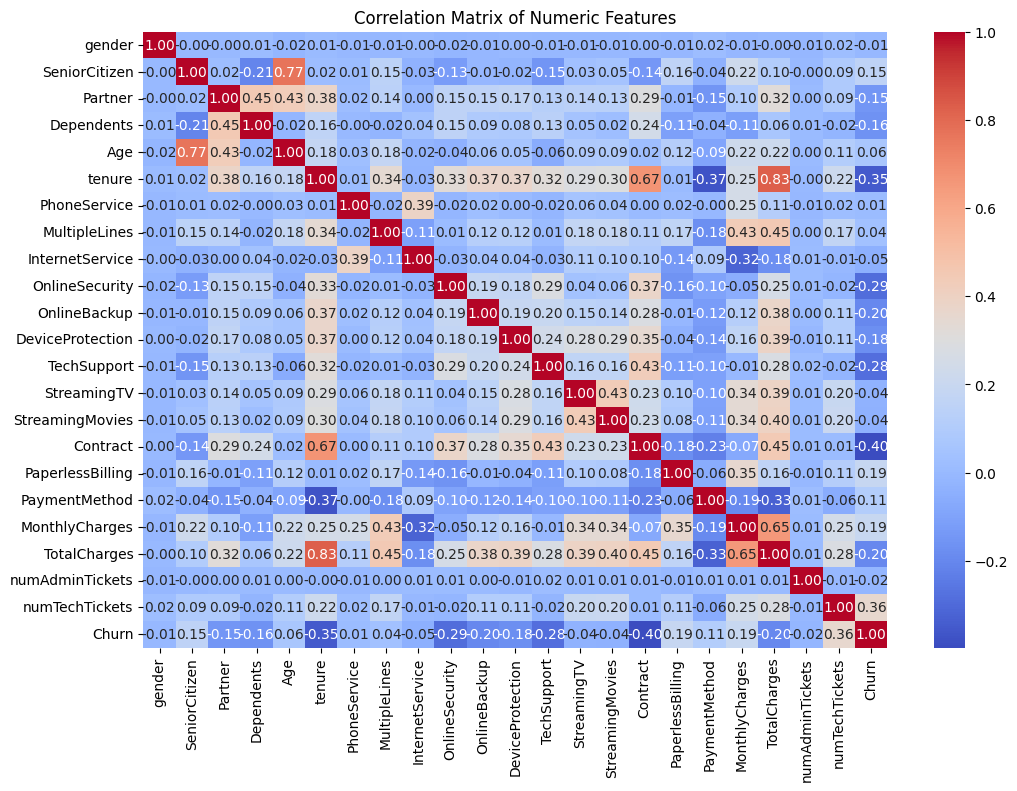

In [46]:
# Lọc chỉ các cột số (numeric columns)
numeric_df = df.select_dtypes(include='number')

# Vẽ Correlation Matrix cho các cột số
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

## 8. Ma Trận Nhầm Lẫn (Confusion Matrix)


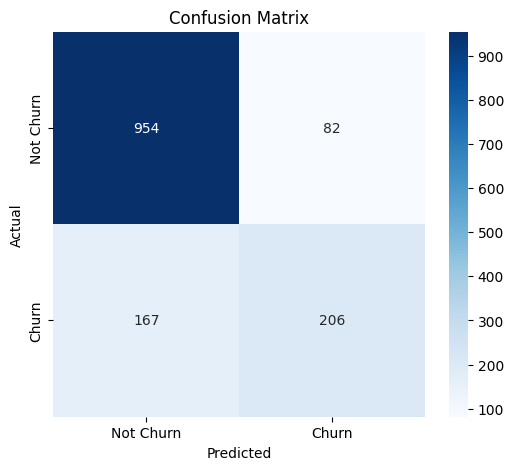

In [47]:
# Vẽ confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 9. Đánh giá mô hình bằng AUC và ROC Curve

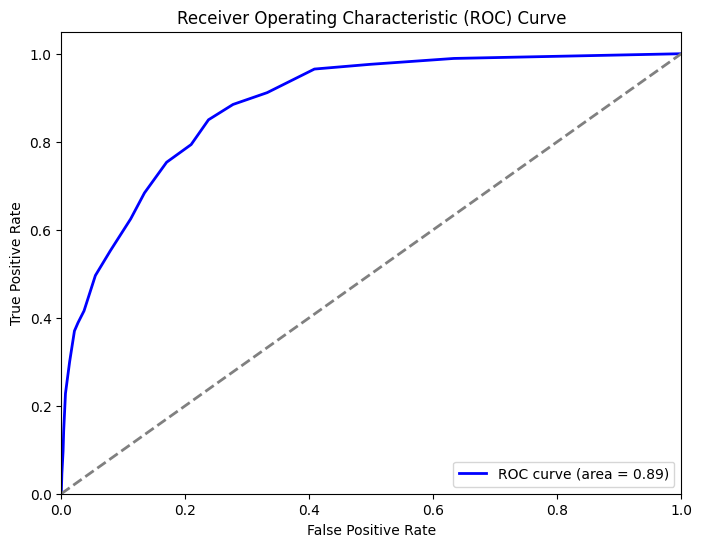

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Dự đoán xác suất của mô hình (chọn xác suất của lớp "1" là churn)
y_prob = knn.predict_proba(X_test_scaled)[:, 1]

# Tính toán fpr, tpr và threshold
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Vẽ ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # đường chéo
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# IV. Logistic Regression

## 1. Đọc dữ liệu

In [49]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



# Đọc dữ liệu từ file Excel
df = pd.read_excel(r'D:\KHO\code\Telco_Churn_dataset.xlsx') 

# Chuẩn bị dữ liệu
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})  # Chuyển đổi cột 'Churn' thành nhị phân

## 2. Tiền xử lý và chuẩn hoá dữ liệu

In [50]:
# Loại bỏ các cột không cần thiết
X = df.drop(columns=['Churn', 'customerID'])  # Loại bỏ cột 'Churn' và 'customerID'
y = df['Churn']  # Cột mục tiêu

# Chuyển đổi các cột phân loại thành dạng số (One-Hot Encoding)
X = pd.get_dummies(X, drop_first=True)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## 3. Xây dựng và huấn luyện mô hình Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

# Xây dựng và huấn luyện mô hình Logistic Regression
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

## 4. Dự đoán và đánh giá mô hình 


In [52]:
from sklearn.metrics import classification_report, accuracy_score

# Dự đoán và đánh giá mô hình trên tập huấn luyện
y_train_pred = model.predict(X_train)

print("Đánh giá trên tập huấn luyện:")
print(classification_report(y_train, y_train_pred))
print("Độ chính xác trên tập huấn luyện:", accuracy_score(y_train, y_train_pred))

# Dự đoán và đánh giá mô hình trên tập kiểm tra
y_test_pred = model.predict(X_test)

print("\nĐánh giá trên tập kiểm tra:")
print(classification_report(y_test, y_test_pred))
print("Độ chính xác trên tập kiểm tra:", accuracy_score(y_test, y_test_pred))


Đánh giá trên tập huấn luyện:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4138
           1       0.98      0.98      0.98      1496

    accuracy                           0.99      5634
   macro avg       0.99      0.99      0.99      5634
weighted avg       0.99      0.99      0.99      5634

Độ chính xác trên tập huấn luyện: 0.9889953851615193

Đánh giá trên tập kiểm tra:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1036
           1       0.64      0.67      0.65       373

    accuracy                           0.81      1409
   macro avg       0.76      0.77      0.76      1409
weighted avg       0.81      0.81      0.81      1409

Độ chính xác trên tập kiểm tra: 0.8119233498935415


## 5. Ma Trận Nhầm Lẫn (Confusion Matrix)


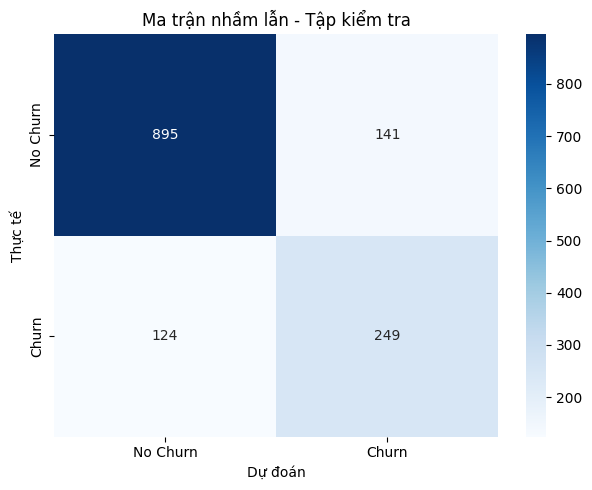

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Tính toán ma trận nhầm lẫn cho tập huấn luyện và kiểm tra
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Vẽ ma trận nhầm lẫn cho cả hai tập
plt.figure(figsize=(12, 5))



# Ma trận nhầm lẫn - Tập kiểm tra
plt.subplot(1, 2, 2)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("Ma trận nhầm lẫn - Tập kiểm tra")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")

# Điều chỉnh bố cục
plt.tight_layout()
plt.show()


## 6. Đánh giá mô hình bằng AUC và ROC Curve

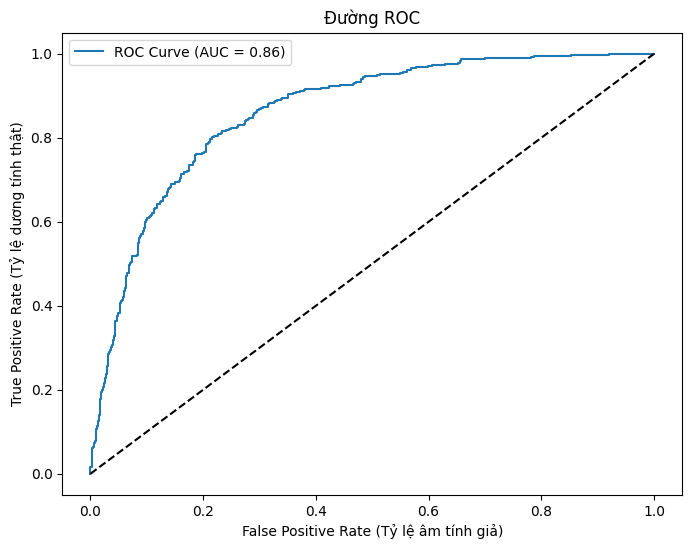

In [54]:
# Tính AUC và vẽ đường ROC của logistic

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

y_test_prob = model.predict_proba(X_test)[:, 1]  # Xác suất thuộc lớp 1
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
auc_score = roc_auc_score(y_test, y_test_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Đường chéo
plt.title("Đường ROC")
plt.xlabel("False Positive Rate (Tỷ lệ âm tính giả)")
plt.ylabel("True Positive Rate (Tỷ lệ dương tính thật)")
plt.legend(loc="best")
plt.show()
